This is my code for the Kaggle Competition [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/). EDA techniques were inspired by [the provided tutorial](https://www.kaggle.com/dgawlik/house-prices-eda) with some modifications. 

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import warnings 
warnings.filterwarnings('ignore')
plt.style.use('bmh')

In [59]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
quantitative_cols = [c for c in train.columns if train.dtypes[c] != 'object' and c != "SalePrice"]
qualitative_cols = [c for c in train.columns if train.dtypes[c] == 'object']

In [60]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [61]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

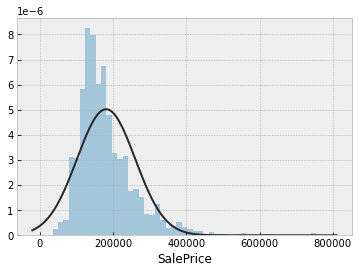

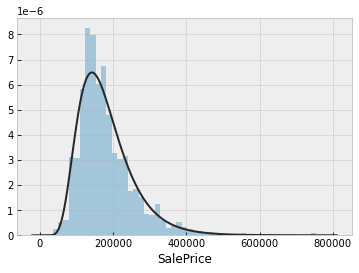

In [63]:
# observe the distribution of the target variable, SalePrice
from scipy.stats import norm, lognorm
plt.figure(1)
sns.distplot(train['SalePrice'], kde=False, fit=norm)
plt.figure(2)
sns.distplot(train['SalePrice'], kde=False, fit=lognorm)

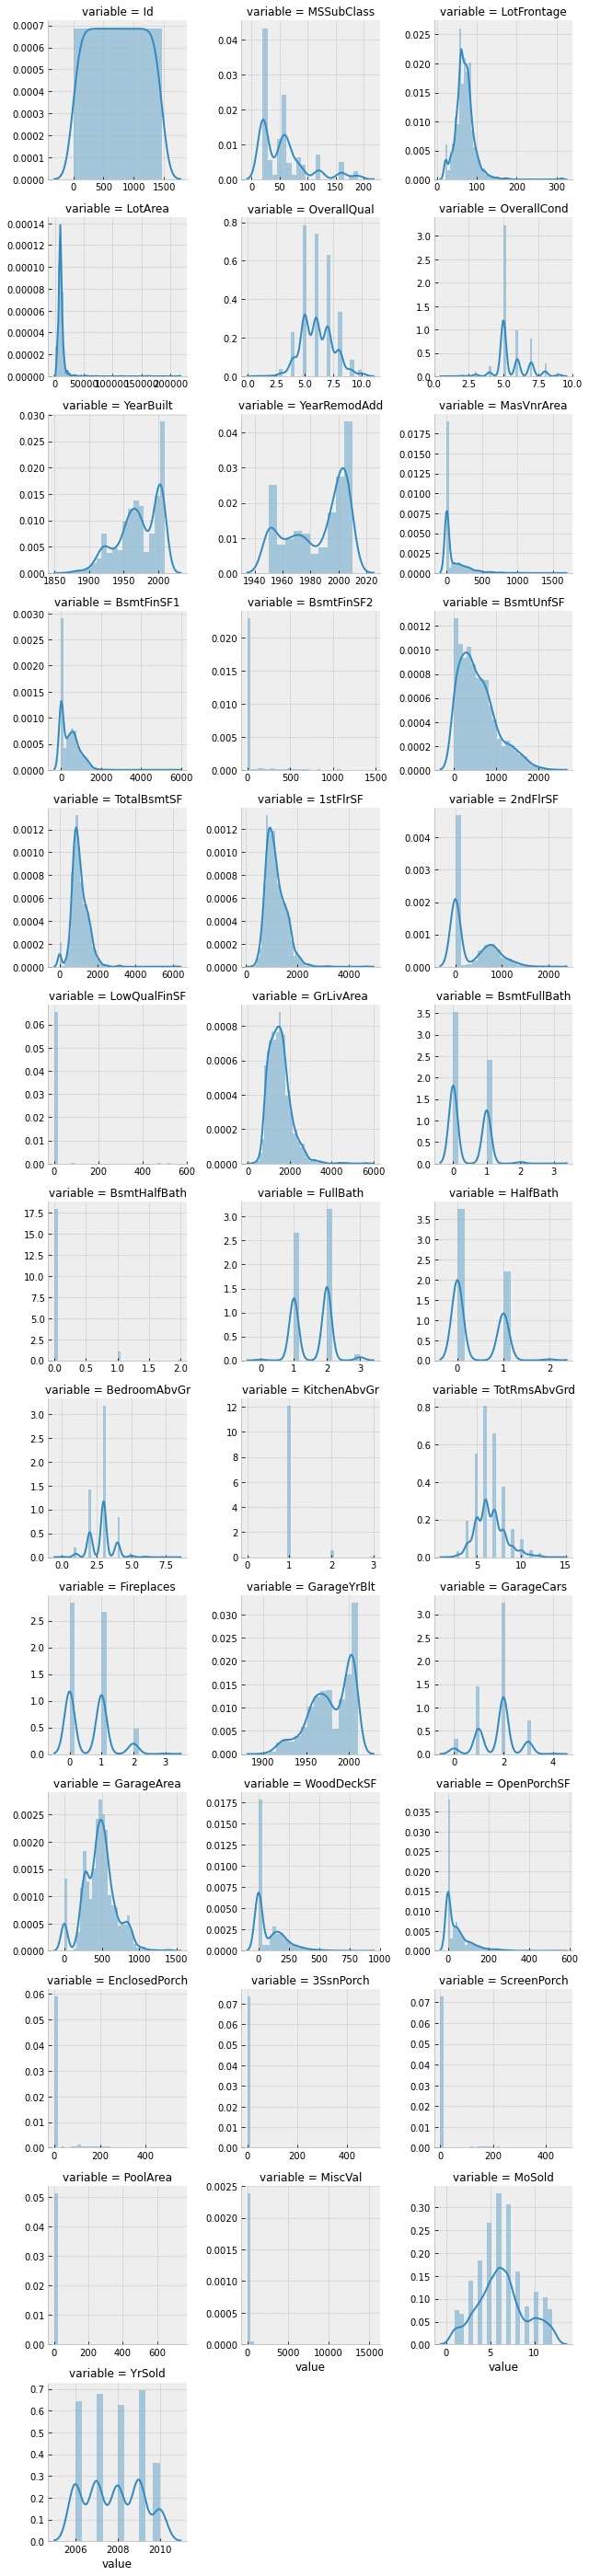

In [64]:
# observe the distribution of the quantitative variables
f = pd.melt(train, value_vars=quantitative_cols)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

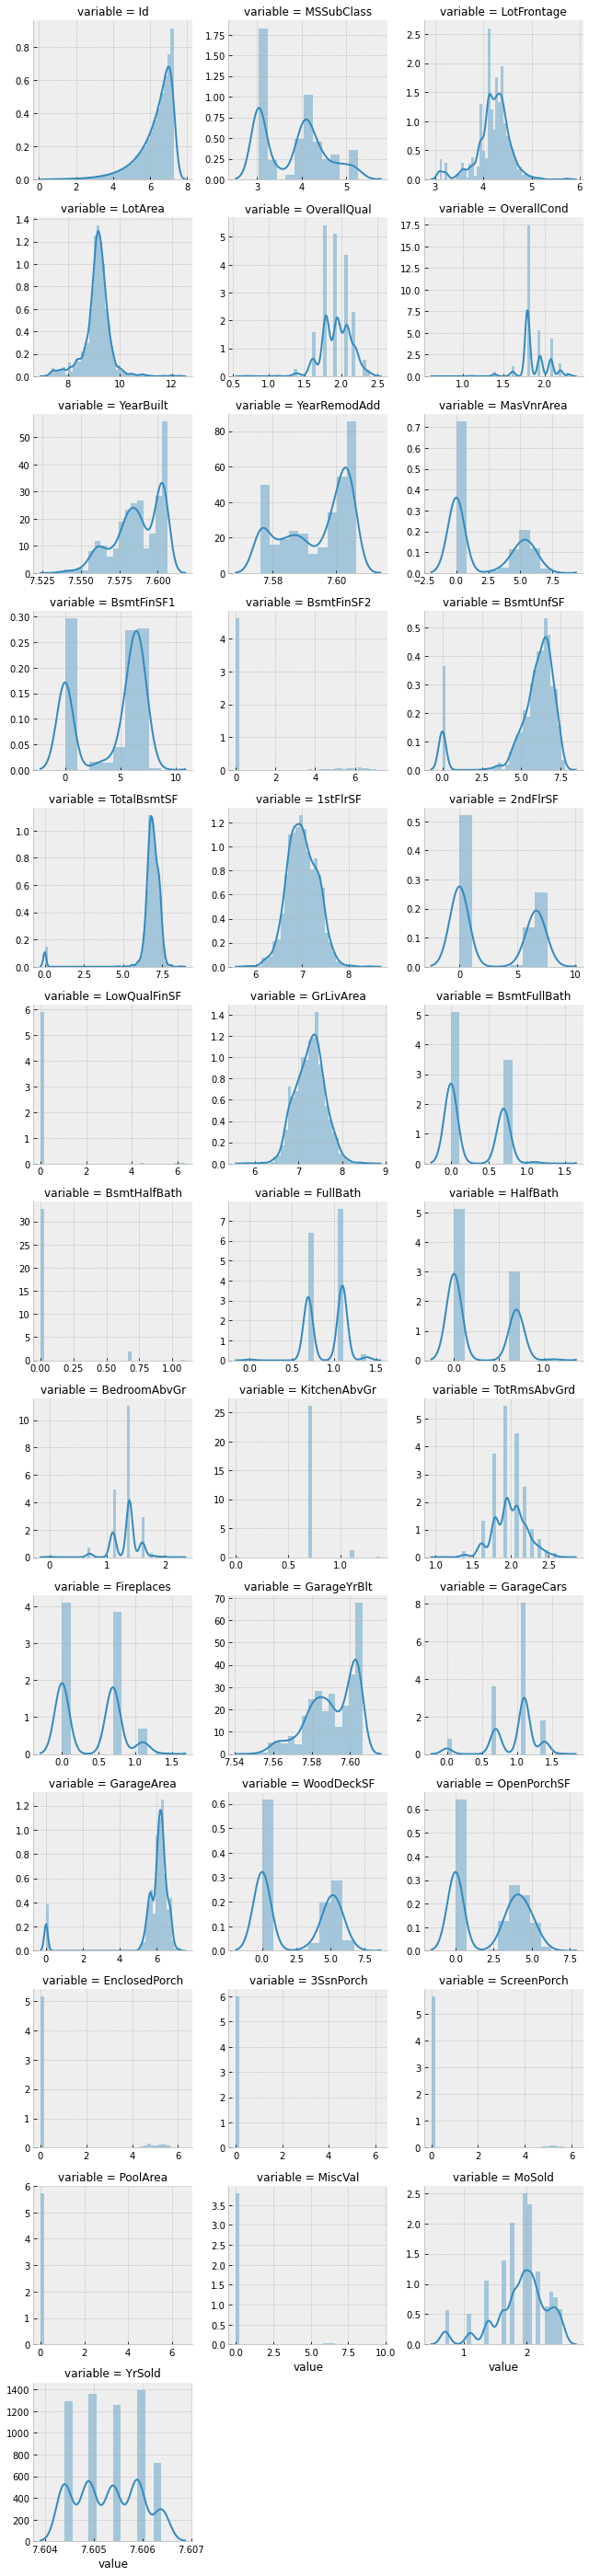

In [65]:
train_log = train[quantitative_cols]
for c in quantitative_cols:
    train_log[c] = np.log1p(train[c])

f = pd.melt(train_log, value_vars=quantitative_cols)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

## Dealing with Missing Values

In [66]:
# Get the missing features here - remove anything that has more than half of the features missing
train.isna().sum().sort_values(ascending=False)[:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [67]:
# Drop all columns where the number of missing values is more than half of the data. Also remove the ID here
to_drop = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "Id"]
train.drop(to_drop, axis=1, inplace=True)
for col in to_drop:
    if col in qualitative_cols:
        qualitative_cols.remove(col)
    else:
        quantitative_cols.remove(col)

In [68]:
# Houses where there are no garages
garage_variables = [var for var in qualitative_cols + quantitative_cols if "Garage" in var]
display(train[train["GarageYrBlt"].isna()][garage_variables])
train[["GarageType", "GarageFinish", "GarageQual", "GarageCond"]] = train[["GarageType", "GarageFinish", "GarageQual", "GarageCond"]].fillna("None")
train["GarageYrBlt"].fillna(0, inplace=True)
train["HasGarage"] = train["GarageArea"].apply(lambda x: 1 if x > 0 else 0)
display(train[train["HasGarage"] == 0][garage_variables])

,GarageType,GarageFinish,GarageQual,GarageCond,GarageYrBlt,GarageCars,GarageArea
39,NaN,NaN,NaN,NaN,NaN,0,0
48,NaN,NaN,NaN,NaN,NaN,0,0
78,NaN,NaN,NaN,NaN,NaN,0,0
88,NaN,NaN,NaN,NaN,NaN,0,0
89,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...
1349,NaN,NaN,NaN,NaN,NaN,0,0
1407,NaN,NaN,NaN,NaN,NaN,0,0
1449,NaN,NaN,NaN,NaN,NaN,0,0
1450,NaN,NaN,NaN,NaN,NaN,0,0


,GarageType,GarageFinish,GarageQual,GarageCond,GarageYrBlt,GarageCars,GarageArea
39,None,None,None,None,0.0,0,0
48,None,None,None,None,0.0,0,0
78,None,None,None,None,0.0,0,0
88,None,None,None,None,0.0,0,0
89,None,None,None,None,0.0,0,0
...,...,...,...,...,...,...,...
1349,None,None,None,None,0.0,0,0
1407,None,None,None,None,0.0,0,0
1449,None,None,None,None,0.0,0,0
1450,None,None,None,None,0.0,0,0


In [69]:
# Houses where there are no basements
bsmt_variables = [var for var in qualitative_cols + quantitative_cols if "Bsmt" in var]
display(train[train["BsmtExposure"].isna()][bsmt_variables])
train[["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]] = train[["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]].fillna("None")
train["HasBsmt"] = train["TotalBsmtSF"].apply(lambda x: 1 if x > 0 else 0)
display(train[train["HasBsmt"] == 0][bsmt_variables])

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
17,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0
39,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0
90,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0
102,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0
156,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0
182,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0
259,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0
342,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0
362,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0
371,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0


,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
17,None,None,None,None,None,0,0,0,0,0,0
39,None,None,None,None,None,0,0,0,0,0,0
90,None,None,None,None,None,0,0,0,0,0,0
102,None,None,None,None,None,0,0,0,0,0,0
156,None,None,None,None,None,0,0,0,0,0,0
182,None,None,None,None,None,0,0,0,0,0,0
259,None,None,None,None,None,0,0,0,0,0,0
342,None,None,None,None,None,0,0,0,0,0,0
362,None,None,None,None,None,0,0,0,0,0,0
371,None,None,None,None,None,0,0,0,0,0,0


In [70]:
# Houses where there are no Masonry veneers
vnr_variables = [var for var in qualitative_cols + quantitative_cols if "MasVnr" in var]
display(train[train["MasVnrType"].isna()][vnr_variables])
display(train[train["MasVnrType"] == "None"][vnr_variables])
# we can replace the NaN MasVnrType with None, and the MasVnrArea with 0
train["MasVnrType"].fillna("None", inplace=True)
train["MasVnrArea"].fillna(0, inplace=True)
train["HasMasVnr"] = train["MasVnrArea"].apply(lambda x: 1 if x > 0 else 0)
display(train[train["HasMasVnr"] == 0][vnr_variables])

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


,MasVnrType,MasVnrArea
1,None,0.0
3,None,0.0
5,None,0.0
8,None,0.0
9,None,0.0
...,...,...
1454,None,0.0
1455,None,0.0
1457,None,0.0
1458,None,0.0


,MasVnrType,MasVnrArea
1,None,0.0
3,None,0.0
5,None,0.0
8,None,0.0
9,None,0.0
...,...,...
1454,None,0.0
1455,None,0.0
1457,None,0.0
1458,None,0.0


In [71]:
train.isna().sum().sort_values(ascending=False)[:5]
# only two values left to deal with

LotFrontage    259
Electrical       1
HasMasVnr        0
BsmtQual         0
Exterior1st      0
dtype: int64

In [72]:
# LotFrontage is a quantitative variable for the amount of street connected to the property
# we can set this to 0 for NaN values
# Electrical is a categorical variable for the electrical system - we can set this as a category called "Missing"
train["LotFrontage"].fillna(0, inplace=True)
train["Electrical"].fillna("None", inplace=True)

## Quantitative Variables

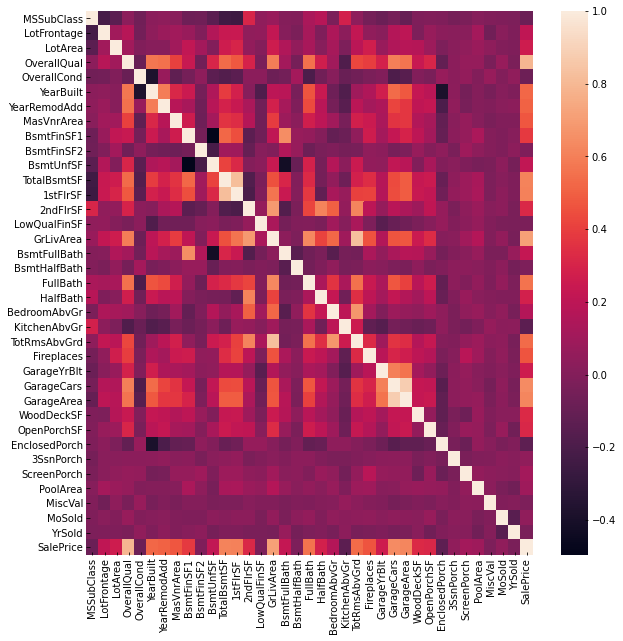

In [73]:
plt.figure(1, figsize=(10, 10))
corr = train[quantitative_cols+['SalePrice']].corr()
sns.heatmap(corr)

In [74]:
# OverallQual, GrLivArea, and GarageCars have very high correlations with SalePrice. We can also see variables that have 
# high correlations with each other. 

In [75]:
high_correlation_quantitative = ["1stFlrSF", "GarageYrBlt", "GarageArea", "TotRmsAbvGrd"]

In [76]:
train.drop(high_correlation_quantitative, axis=1, inplace=True)

In [77]:
quantitative_cols = [c for c in quantitative_cols if c not in high_correlation_quantitative]

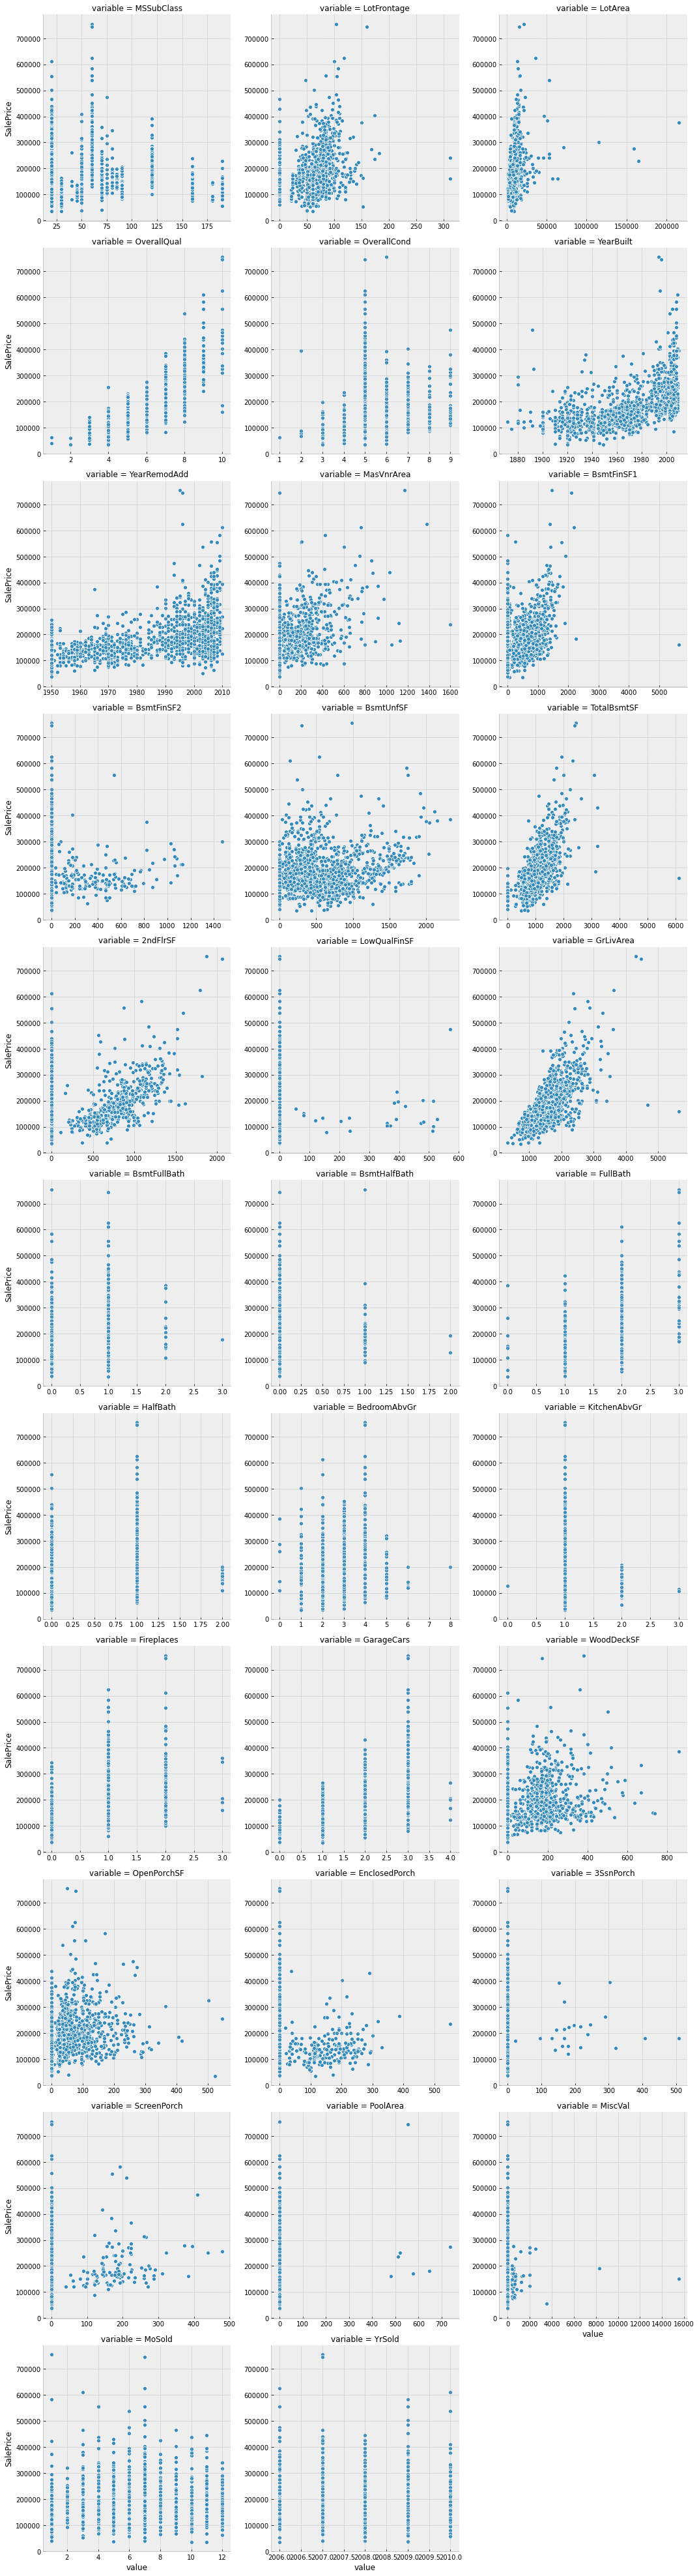

In [78]:
f = pd.melt(train, id_vars=['SalePrice'], value_vars=quantitative_cols)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(sns.scatterplot, "value", "SalePrice")

## Qualitative Variables

In [79]:
train[qualitative_cols].describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,...,6,4,7,7,4,6,6,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,...,1334,735,1360,870,605,1311,1326,1340,1267,1198


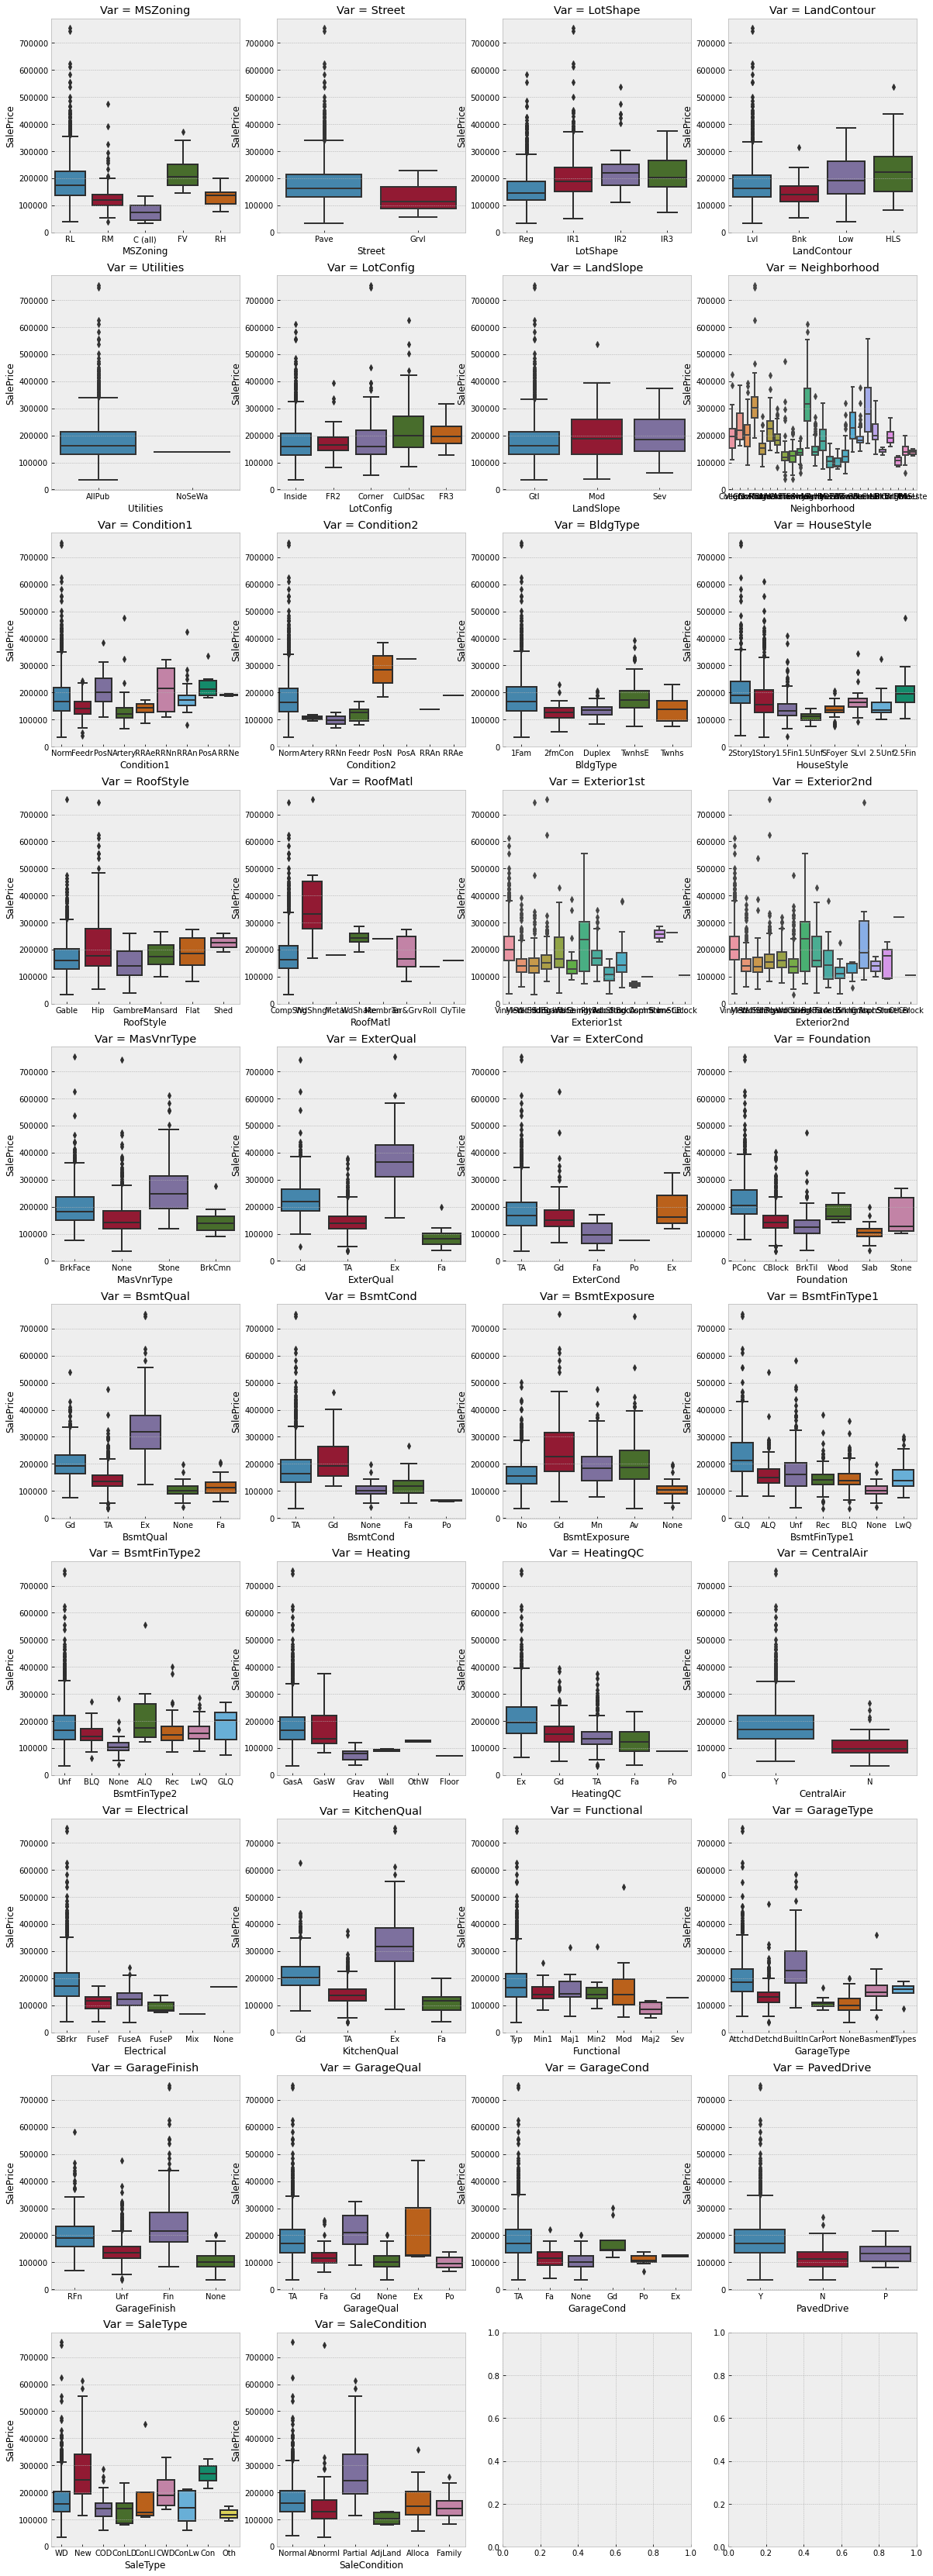

In [80]:
# There are a lot of qualitative variables, 
# so converting them all to dummy variables would result in an excessively high number of columns. 
# For each one, we can sort the categories by mean sale price and then assign quantitative encodings.

n_rows = 10
n_cols = 4
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 60))
for i, column in enumerate(qualitative_cols):
    sns.boxplot(x=train[column],y=train["SalePrice"], ax=axes[i//n_cols,i%n_cols])
    axes[i//n_cols,i%n_cols].set_title(f"Var = {column}")
plt.show()

In [81]:
def encode(df, feature):
    categories_in_order = df[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice'].sort_values()
    categories_in_order = categories_in_order.reset_index()
    categories_in_order['label'] = categories_in_order.index.map(lambda x: x+1)
    categories_in_order = categories_in_order.set_index(feature)
    return categories_in_order['label'].to_dict()

column_category_mappings = dict()

for q in qualitative_cols:  
    column_category_mappings[q] = encode(train, q)
    train[q] = train[q].replace(column_category_mappings[q])

train[qualitative_cols]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,4,2,1,2,2,1,1,17,5,5,...,6,3,7,6,3,4,6,3,5,5
1,4,2,1,2,2,2,1,21,3,5,...,6,2,7,6,3,4,6,3,5,5
2,4,2,2,2,2,1,1,17,5,5,...,6,3,7,6,3,4,6,3,5,5
3,4,2,2,2,2,3,1,18,5,5,...,6,3,7,3,2,4,6,3,5,2
4,4,2,2,2,2,2,1,25,5,5,...,6,3,7,6,3,4,6,3,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4,2,1,2,2,1,1,15,5,5,...,6,2,7,6,3,4,6,3,5,5
1456,4,2,1,2,2,1,1,14,5,5,...,6,2,4,6,2,4,6,3,5,5
1457,4,2,1,2,2,1,1,18,5,5,...,6,3,7,6,3,4,6,3,5,5
1458,4,2,1,2,2,1,1,11,5,5,...,4,3,7,6,2,4,6,3,5,5


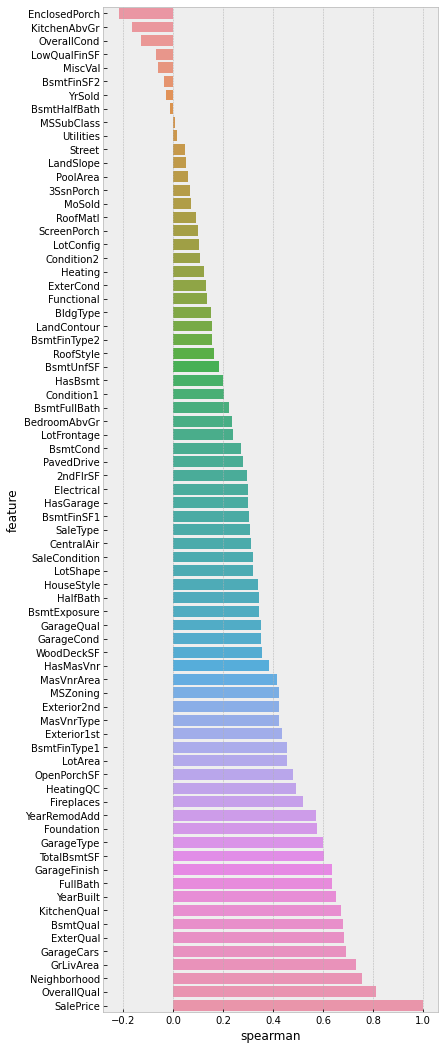

In [25]:
# Spearman correlation - 
def spearman(frame, feature_cols):
    spr = pd.DataFrame()
    spr['feature'] = feature_cols
    spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in feature_cols]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(feature_cols)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
feature_cols = train.columns
spearman(train, feature_cols)

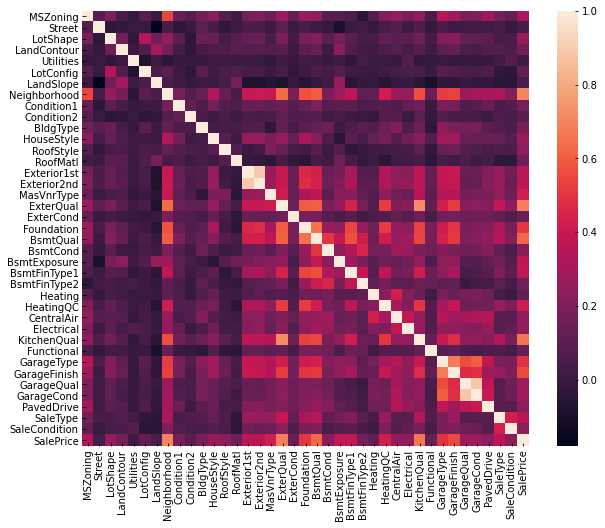

In [26]:
plt.figure(figsize=(10, 8))
corr = train[qualitative_cols+['SalePrice']].corr()
sns.heatmap(corr)

In [27]:
corr['Exterior2nd']['SalePrice']

0.3653835551250569

In [28]:
train["GarageQual"].value_counts()

4    1311
2      81
3      48
5      14
6       3
1       3
Name: GarageQual, dtype: int64

In [29]:
train.drop(['Exterior2nd', "GarageQual"], axis=1, inplace=True)
qualitative_cols.remove('Exterior2nd')
qualitative_cols.remove('GarageQual')

In [30]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasGarage,HasBsmt,HasMasVnr
0,60,4,65.0,8450,2,1,2,2,1,1,...,0,0,2,2008,5,5,208500,1,1,1
1,20,4,80.0,9600,2,1,2,2,2,1,...,0,0,5,2007,5,5,181500,1,1,0
2,60,4,68.0,11250,2,2,2,2,1,1,...,0,0,9,2008,5,5,223500,1,1,1
3,70,4,60.0,9550,2,2,2,2,3,1,...,0,0,2,2006,5,2,140000,1,1,0
4,60,4,84.0,14260,2,2,2,2,2,1,...,0,0,12,2008,5,5,250000,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,4,62.0,7917,2,1,2,2,1,1,...,0,0,8,2007,5,5,175000,1,1,0
1456,20,4,85.0,13175,2,1,2,2,1,1,...,0,0,2,2010,5,5,210000,1,1,1
1457,70,4,66.0,9042,2,1,2,2,1,1,...,0,2500,5,2010,5,5,266500,1,1,0
1458,20,4,68.0,9717,2,1,2,2,1,1,...,0,0,4,2010,5,5,142125,1,1,0


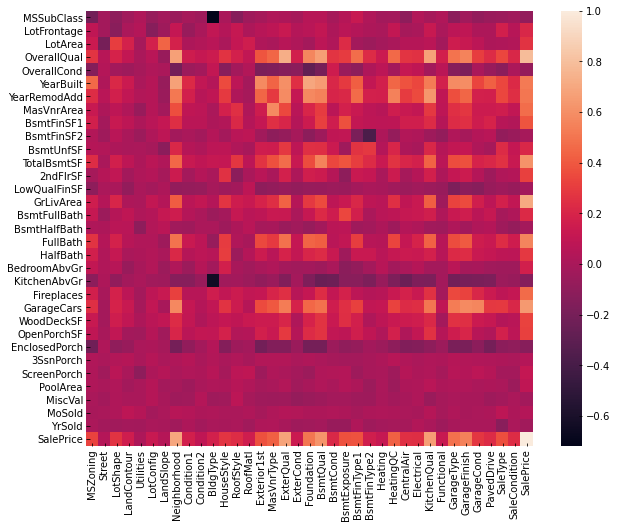

In [31]:
plt.figure(figsize=(10, 8))
mix_corr = pd.DataFrame(np.zeros([len(quantitative_cols) + 1, len(qualitative_cols) + 1]), 
                        index=quantitative_cols+['SalePrice'], columns=qualitative_cols+['SalePrice'])
for q1 in quantitative_cols+['SalePrice']:
    for q2 in qualitative_cols+['SalePrice']:
        mix_corr.loc[q1, q2] = train[q1].corr(train[q2])
sns.heatmap(mix_corr)

In [32]:
mix_corr.loc["OverallQual"] > 0.6

MSZoning         False
Street           False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood      True
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
RoofStyle        False
RoofMatl         False
Exterior1st      False
MasVnrType       False
ExterQual         True
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinType2     False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
KitchenQual       True
Functional       False
GarageType       False
GarageFinish     False
GarageCond       False
PavedDrive       False
SaleType         False
SaleCondition    False
SalePrice         True
Name: OverallQual, dtype: bool

In [33]:
train.drop(["KitchenQual", "BsmtQual", "ExterQual", "Neighborhood"], axis=1, inplace=True)

In [34]:
# more indicator variables for things that the house has/doesn't have
train['Has2ndFloor'] = train['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
train['HasWoodDeck'] = train['WoodDeckSF'].apply(lambda x: 1 if x > 0 else 0)
train['HasPorch'] = train['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)
train['HasPool'] = train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
train['IsNew'] = train['YearBuilt'].apply(lambda x: 1 if x > 2000 else 0)

In [35]:
booleans = [c for c in train.columns if "Has" in c or "Is" in c]

## Applying Models

In [36]:
features = train.drop("SalePrice", axis=1)
target = train["SalePrice"]

In [37]:
import sklearn.linear_model as linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
Xtrain, Xval, ytrain, yval = train_test_split(features, target, random_state=0, test_size=0.3)

In [38]:
# Models to Try:
# linear regression - sklearn.linear_model.LinearRegression()
# kernelized SVM - sklearn.svm.SVC
# regression tree + boosting - sklearn.ensemble.GradientBoostingRegressor
# lasso - sklearn.linear_model.LassoLarsCV
# ridge regression - sklearn.linear_model.RidgeCV

In [39]:
rmse = (lambda true, pred: mean_squared_error(np.log(true), np.log(pred), squared=False))

### Linear Models

In [40]:
# Linear Regression
linreg = linear_model.LinearRegression()
linreg.fit(Xtrain, np.log(ytrain))
preds = np.exp(linreg.predict(Xval))
rmse(yval, preds)

0.1723985487975582

In [41]:
ridge = linear_model.RidgeCV(alphas = [0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 1, 3, 5, 10, 30, 50])
ridge.fit(Xtrain, np.log(ytrain))
preds = np.exp(ridge.predict(Xval))
rmse(yval, preds)

0.17125281682982615

In [42]:
lasso = linear_model.LassoLarsCV(max_iter = 20000)
lasso.fit(Xtrain, np.log(ytrain))
preds = np.exp(lasso.predict(Xval))
rmse(yval, preds)

0.1678145250103432

### Nonlinear Models

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
svm = SVR()
svm_params = {
    "kernel": ['poly', 'rbf', 'sigmoid'],
    "C": [0.01, 0.1, 1, 10, 50]
}
cross_val = GridSearchCV(svm, svm_params, verbose=1, scoring="neg_root_mean_squared_error")
cross_val.fit(Xtrain, np.log(ytrain))
best_svm = cross_val.best_estimator_
print(best_svm)
best_svm.fit(Xtrain, np.log(ytrain))
preds = np.exp(best_svm.predict(Xval))
rmse(yval, preds)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  1.2min finished


SVR(C=50)


0.16246205070308423

In [51]:
# Regression with SGD - we also must apply standardization first
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
sgd_params = {'sgdregressor__penalty': ['l1', 'l2', 'elasticnet'], 'sgdregressor__alpha': [0.0001, 0.001, 0.01, 0.1]}
sgd = linear_model.SGDRegressor()
sgd_pipeline = make_pipeline(StandardScaler(), sgd)
cross_val = GridSearchCV(sgd_pipeline, sgd_params, verbose=1, scoring="neg_root_mean_squared_error")
cross_val.fit(Xtrain, np.log(ytrain))
best_sgd = cross_val.best_estimator_
print(best_sgd)
best_sgd.fit(Xtrain, np.log(ytrain))
preds = np.exp(best_sgd.predict(Xval))
rmse(yval, preds)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor(alpha=0.1, penalty='l1'))])


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    3.2s finished


0.20284265439148283

In [55]:
from sklearn.ensemble import GradientBoostingRegressor
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01
}
reg = GradientBoostingRegressor(**params)
reg.fit(Xtrain, np.log(ytrain))
preds = np.exp(reg.predict(Xval))
rmse(yval, preds)

0.1283948445987895

#### Applying Current Feature Engineering to Test Data for Baseline Submission

In [105]:
test = pd.read_csv("test.csv")
test.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)
test[["GarageType", "GarageFinish", "GarageQual", "GarageCond"]] = test[["GarageType", "GarageFinish", "GarageQual", "GarageCond"]].fillna("None")
test["GarageYrBlt"].fillna(0, inplace=True)
test["HasGarage"] = test["GarageArea"].apply(lambda x: 1 if x > 0 else 0)
test[["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]] = test[["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]].fillna("None")
test["HasBsmt"] = test["TotalBsmtSF"].apply(lambda x: 1 if x > 0 else 0)
test["MasVnrType"].fillna("None", inplace=True)
test["MasVnrArea"].fillna(0, inplace=True)
test["HasMasVnr"] = test["MasVnrArea"].apply(lambda x: 1 if x > 0 else 0)
test["LotFrontage"].fillna(0, inplace=True)
test["Electrical"].fillna("None", inplace=True)
test.drop(high_correlation_quantitative, axis=1, inplace=True)

for q in qualitative_cols:  
    test[q] = test[q].replace(column_category_mappings[q])
test.fillna(0, inplace=True)
test.drop(['Exterior2nd', "GarageQual"], axis=1, inplace=True)
test.drop(["KitchenQual", "BsmtQual", "ExterQual", "Neighborhood"], axis=1, inplace=True)
test['Has2ndFloor'] = test['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
test['HasWoodDeck'] = test['WoodDeckSF'].apply(lambda x: 1 if x > 0 else 0)
test['HasPorch'] = test['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)
test['HasPool'] = test['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
test['IsNew'] = test['YearBuilt'].apply(lambda x: 1 if x > 2000 else 0)


In [106]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,SaleType,SaleCondition,HasGarage,HasBsmt,HasMasVnr,Has2ndFloor,HasWoodDeck,HasPorch,HasPool,IsNew
0,1461,20,3.0,80.0,11622,2,1,2,2.0,1,...,5.0,5,1,1,0,0,1,0,0,0
1,1462,20,4.0,81.0,14267,2,2,2,2.0,3,...,5.0,5,1,1,1,0,1,1,0,0
2,1463,60,4.0,74.0,13830,2,2,2,2.0,1,...,5.0,5,1,1,0,1,1,1,0,0
3,1464,60,4.0,78.0,9978,2,2,2,2.0,1,...,5.0,5,1,1,1,1,1,1,0,0
4,1465,120,4.0,43.0,5005,2,2,4,2.0,1,...,5.0,5,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,2.0,21.0,1936,2,1,2,2.0,1,...,5.0,5,0,1,0,1,0,0,0,0
1455,2916,160,2.0,21.0,1894,2,1,2,2.0,1,...,5.0,2,1,1,0,1,0,1,0,0
1456,2917,20,4.0,160.0,20000,2,1,2,2.0,1,...,5.0,2,1,1,0,0,1,0,0,0
1457,2918,85,4.0,62.0,10441,2,1,2,2.0,1,...,5.0,5,0,1,0,0,1,1,0,0


In [107]:
Xtest = test.drop("Id", axis=1)
test["SalePrice"] = np.exp(reg.predict(Xtest))
submission = test[["Id", "SalePrice"]]

In [110]:
submission.to_csv("first_submission.csv", index=False)